In [72]:
import matplotlib


In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import wordcloud
from datetime import datetime, date
import time
from datetime import date
import plotly.express as px
import imageio
import simple_colors  
from termcolor import colored  
from matplotlib.patches import Patch
from wordcloud import wordcloud, STOPWORDS, ImageColorGenerator


In [73]:
df_Patients = pd.read_excel("HospitalDatabase.xlsx","Patients")
df_EDvisits = pd.read_excel("HospitalDatabase.xlsx","EDVisits")
df_AmbulatoryVisits = pd.read_excel("HospitalDatabase.xlsx","AmbulatoryVisits")
df_ReadmissionRegistry = pd.read_excel("HospitalDatabase.xlsx","ReAdmissionRegistry")
df_Discharges = pd.read_excel("HospitalDatabase.xlsx","Discharges")
df_Providers = pd.read_excel("HospitalDatabase.xlsx","Providers")
df_EDunique = pd.read_excel("HospitalDatabase.xlsx","EDUnique")


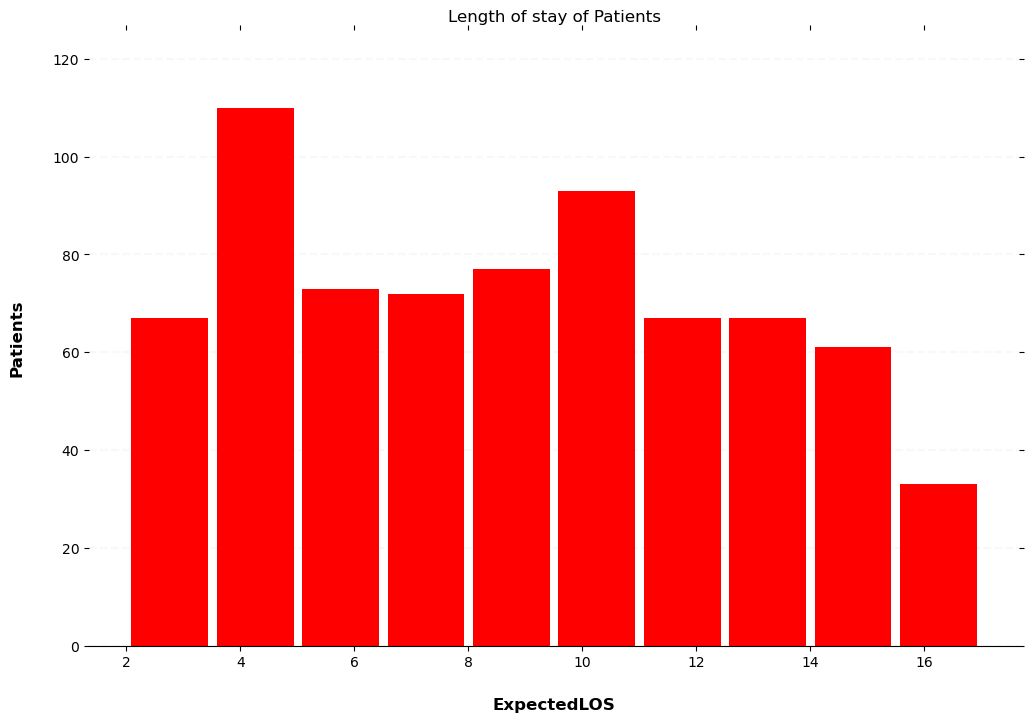

In [221]:
# 41. Plot a graph to show the distribution of expected length of stay.

Elos1 = df_ReadmissionRegistry.hist(column='ExpectedLOS', bins=10, grid=False, figsize=(12,8), color ='red', zorder=2, rwidth=0.9)
Elos1 = Elos1[0]
for x in Elos1 :
    
    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # title 
    x.set_title("Length of stay of Patients")

    # Set x-axis label
    x.set_xlabel("ExpectedLOS", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Patients", labelpad=20, weight='bold', size=12)
   
# df_Discharges.hist(column='ExpectedLOS')

plt.show()


In [8]:
# 42. Delete the column 'DischargeDispostion' iteratively.

sheets = [df_Patients, df_EDvisits, df_AmbulatoryVisits, df_ReadmissionRegistry, df_Discharges, df_Providers, df_EDunique]
#col = 'DischargeDispostion'
for df in sheets:
    for col in df.columns:
        if 'DischargeDisposition' in col:
            #df.drop('DischargeDisposition', axis=1, inplace=True)
            del df['DischargeDisposition']
print(sheets, "\n")



[     PatientID FirstName  LastName             DateOfBirth Gender  \
0            1     Lanni       Sue 1960-01-01 00:00:00.000   Male   
1            2       Far     Myers 1985-11-15 02:08:42.090   Male   
2            3   Devlin    Michael 1976-04-15 02:52:09.762   Male   
3            4   Carmine     Texas 1968-10-15 03:32:13.635   Male   
4            5     Tann       Bama 1962-05-01 19:12:58.950   Male   
..         ...       ...       ...                     ...    ...   
940        941       Wat   Fideler 1986-05-26 00:01:19.761   Male   
941        942    Wandie  Baythrop 1970-06-10 21:41:03.814   Male   
942        943   Diahann   Smeeton 1983-01-08 21:49:27.884   Male   
943        944  Panchito   Sharple 1963-06-05 07:57:05.569   Male   
944        945     Walsh    Calvie 1972-08-06 03:40:03.454   Male   

                       Race Language  
0                     White  English  
1                     White  English  
2                     White  English  
3             

In [22]:
# 43. Find the age prone to get stroke.

#Age
import pandas as pd
from datetime import datetime, date
import time
from datetime import date
df_Patients = pd.read_excel("HospitalDatabase.xlsx","Patients")
df_Patients['DateOfBirth'] = pd.to_datetime(df_Patients['DateOfBirth'])
current_date = datetime.today()
df_Patients['Age'] = (current_date - df_Patients['DateOfBirth']).dt.days // 365
df_Patients = df_Patients.drop(columns=['FirstName', 'LastName','DateOfBirth','Gender','Race','Language'])
df_PatientsNew = pd.merge(df_Patients,df_Discharges,on=["PatientID"])
df_Stroke = df_PatientsNew[df_PatientsNew['PrimaryDiagnosis'] == 'Stroke']                              
df_Age = (df_Stroke.groupby(df_Patients['Age']).count()).sort_values('PrimaryDiagnosis', ascending=False) 

print("The Age", df_Age.index[0] , "is  prone to strokes.")

The Age 38 is  prone to strokes.


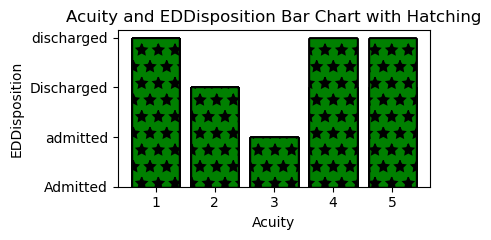

In [129]:
# 44. Create a bar chart by making list on Acuity & EDDisposition column (with no duplicates) & make the hatchs onto the bar by using set_hatch() method.


#lables = df_EDunique['Acuity'].unique()
#lables1 = df_EDunique['EDDisposition'].unique()

fig, ax = plt.subplots()
bar_width = 0.4
bar=plt.bar(x =df_EDunique['Acuity'], height =df_EDunique['EDDisposition'],
        edgecolor='black',hatch=['*'], facecolor='g')
ax.set_xlabel('Acuity')
ax.set_ylabel('EDDisposition')
ax.set_title('Acuity and EDDisposition Bar Chart with Hatching')
  
plt.show()

In [17]:
# 45. Usage of Enumeration in Python with any example.
# with enumeration we can get  indices  of the values next to eachother and easy to pull data or values form there. 
#example
df_EDunique = pd.read_excel("HospitalDatabase.xlsx","EDUnique")
#ReasonForVisit
test = df_EDunique['ReasonForVisit']
for i,j in enumerate(test):
    if i < 5 :
        i = i+1
        print(i, j)
    

1 Stomach Ache
2 Migraine
3 Stomach Ache
4 Migraine
5 Chest Pain


C:\Users\Rajanikanth\AppData\Local\Temp\ipykernel_11588\608498589.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df_EDvisits.corr(), vmin=-1, vmax=1, annot=True)


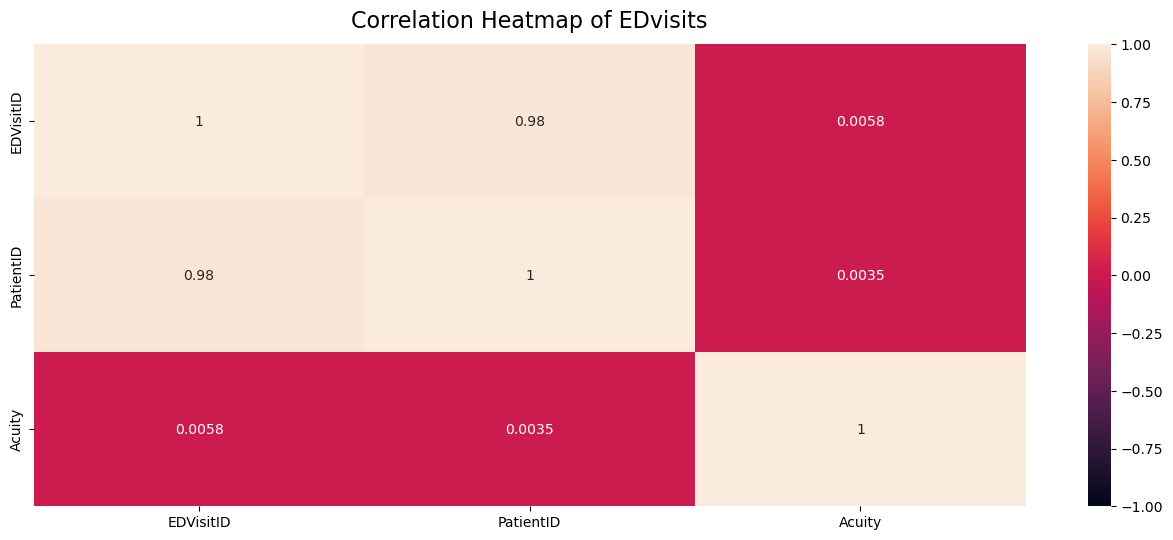

In [9]:
# 46. Create a heat map to show the correlation between the column values of Edvisits.
#sns.heatmap(df_EDvisits.corr());
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_EDvisits.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap of EDvisits', fontdict={'fontsize':16}, pad=12);
plt.show()

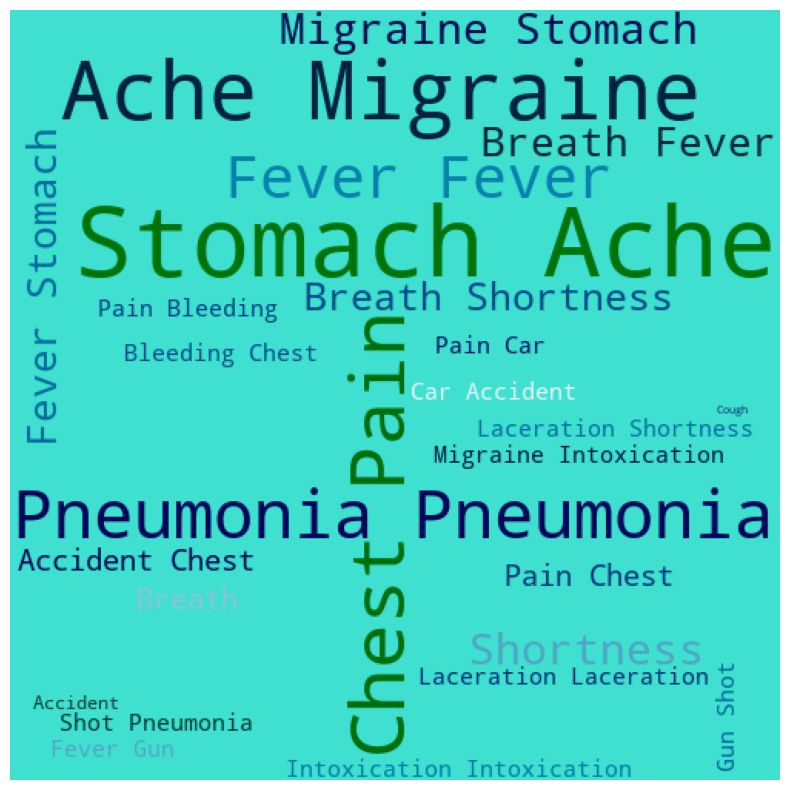

In [7]:
# 47. Create a WordCloud Chart with Reason For Visit.
from wordcloud import WordCloud
import matplotlib.pyplot as plt
df_EDvisits = pd.read_excel("HospitalDatabase.xlsx","EDVisits")
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud)
    plt.axis("off");
text = df_EDvisits['ReasonForVisit'].tolist()
text_join = ' '.join(text)
wordcloud = WordCloud(width = 500, height = 500, background_color='#40E0D0', colormap="ocean",  random_state=10).generate(text_join)
plot_cloud(wordcloud)

In [51]:
# 48. List male patients over the age of 60 who have undergone surgery from January-March 2019.
df_Patients = pd.read_excel("HospitalDatabase.xlsx","Patients")
df_AmbulatoryVisits = pd.read_excel("HospitalDatabase.xlsx","AmbulatoryVisits")

# merge three tables
#merge_tables = pd.merge(df_Patients, df_AmbulatoryVisits, left_on=['PatientID'], right_on['PatientMRN'])   
#merge_details = pd.concat([df_Patients,  df_AmbulatoryVisits], axis=1)

     # convert the date and fetch Jan - Mar 2019 dates
df_Dscheduled = pd.to_datetime(df_AmbulatoryVisits['DateScheduled'])     

# adding AGE column to patients

df_Patients['DateOfBirth'] = pd.to_datetime(df_Patients['DateOfBirth'])
current_date = datetime.today()
df_Patients['Age'] = (current_date - df_Patients['DateOfBirth']).dt.days // 365

#dropped unwanted columns
df_AmbulatoryVisits = df_AmbulatoryVisits.drop(columns=['VisitID','PatientMRN','ProviderID','DateofVisit','VisitDepartmentID','BloodPressureSystolic',
       'BloodPressureDiastolic', 'Pulse', 'VisitStatus'])          
df_Patients = df_Patients.drop(columns=['FirstName', 'LastName','DateOfBirth', 'Race','Language'])
merge_details = pd.concat([df_Patients,  df_AmbulatoryVisits], axis=1)
# pull the male patients over age of 60, filter

df_filter = merge_details[(df_AmbulatoryVisits['DateScheduled'] >= '2019-1-01')  &  (df_AmbulatoryVisits['DateScheduled'] <= '2019-3-31') &
                            (df_Patients['Gender'] == 'Male') &  (df_Patients['Age'] >= 60) &
                            (df_AmbulatoryVisits['VisitType'] =='Follow Up')]
#text = colored('Welcome at Javatpoint.com!', 'yellow', attrs=['bold'])  
text = colored('Patients who returned for a follow up are assumed who have undergone Surgery','blue',attrs=['bold']) 
print(text , '\n' ,df_filter)

Patients who returned for a follow up are assumed who have undergone Surgery 
      PatientID Gender   Age           DateScheduled  VisitType
18        19.0   Male  63.0 2019-01-07 06:04:17.575  Follow Up
149      150.0   Male  61.0 2019-02-17 14:34:07.328  Follow Up
163      164.0   Male  60.0 2019-02-10 23:12:31.185  Follow Up
228      229.0   Male  61.0 2019-02-11 18:20:38.164  Follow Up
359      360.0   Male  62.0 2019-03-12 04:12:03.140  Follow Up
406      407.0   Male  60.0 2019-01-13 16:35:17.756  Follow Up
443      444.0   Male  63.0 2019-01-17 21:22:25.750  Follow Up
482      483.0   Male  61.0 2019-02-21 02:40:13.824  Follow Up
485      486.0   Male  60.0 2019-03-25 19:43:53.653  Follow Up
512      513.0   Male  62.0 2019-01-30 10:58:15.601  Follow Up
514      515.0   Male  61.0 2019-02-12 08:10:53.817  Follow Up
518      519.0   Male  60.0 2019-03-13 03:33:34.627  Follow Up
528      529.0   Male  63.0 2019-03-16 01:38:01.089  Follow Up
532      533.0   Male  60.0 2019-03-21 

In [73]:
# 49. Create a dataframe with acuity and EDDisposition as the indices and the count of number of patients as the value.

df_EDvisits = pd.read_excel("HospitalDatabase.xlsx","EDVisits")

df_EDvisits = df_EDvisits.drop(columns=['EDVisitID','VisitDate','EDDischargeTime','ReasonForVisit'])
data = {"Acuity":df_EDvisits['Acuity'], "Rfv":df_EDvisits['EDDisposition']}
df_Acuity_Rfv= pd.DataFrame(data)
df_with_indices = df_EDvisits.set_index(['Acuity', 'EDDisposition'])
df_NoPatients = df_with_indices.groupby(['Acuity','EDDisposition']).count()

print(df_NoPatients)



                      PatientID
Acuity EDDisposition           
1      Admitted              32
       Discharged           558
2      Admitted             116
       Discharged            66
3      Admitted              81
4      Admitted             107
       Discharged            30
5      Admitted             179
       Discharged            30


In [9]:
# 50. Using loc, retrieve the firstname and lastname of patients between indices 101 and 200.
df_Patients.loc[101:200,['FirstName','LastName']]

FirstName    LastName
101     Gipsy    Frankton
102    Jethro      Wharin
103       Viv     Aylward
104     Swift   Dreschler
105     Fadel  Jacquemard
..        ...         ...
196      Noam    Laguerre
197      Arie     Bayless
198    Janaye     O'Mohun
199      Fonz       Group
200  Cummings      Pickup

[100 rows x 2 columns]

In [156]:
# 51. np.arange(1,31).reshape(6,5), find array slicing to get the elements 4,5,24,25,29,30. When the value is less than 6, print as -1,else print 99.

array = np.arange(1,31).reshape(6,5)
#print (array)
x = array[[0, 4, 5]] [:,[3,4]]
print(x)
x = np.where(x < 6, -1, 99)
print(x)


[[ 4  5]
 [24 25]
 [29 30]]
[[-1 -1]
 [99 99]
 [99 99]]


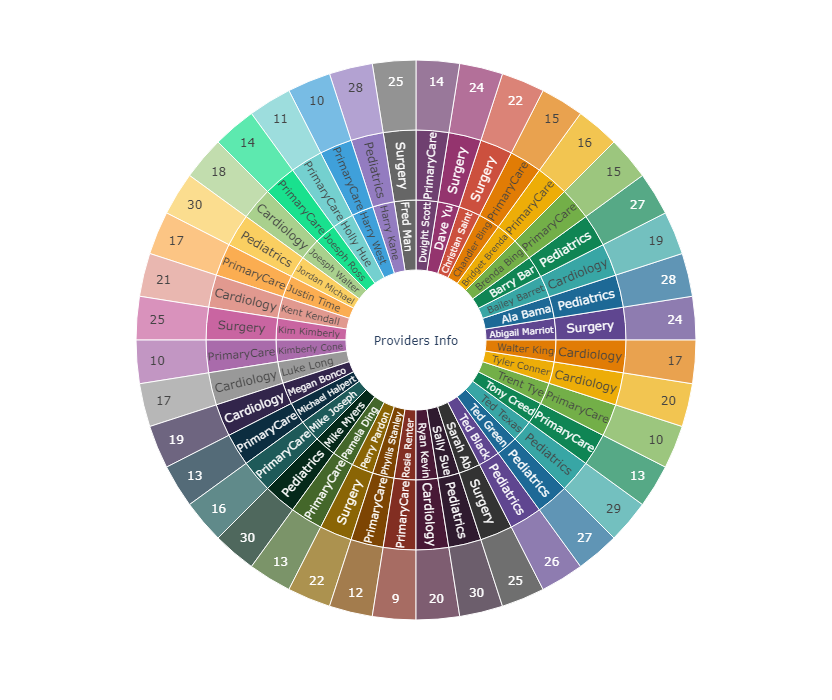

In [200]:
# 52. Using Sunburst chart display the providers name by thier provider speciality, considering thier experience.

df_Providers = pd.read_excel("HospitalDatabase.xlsx","Providers")
# convert Date
df_onstaff = pd.to_datetime(df_Providers['ProviderDateOnStaff'])
current_year = datetime.today()
df_Experience = (current_year - df_onstaff).dt.days // 365
#name = ['Providers Info'], 

df_Providers["P_Info"] = "Providers Info"   
# print(df_Experience)
# Sunburst chart
fig = px.sunburst(df_Providers, path = ['P_Info','ProviderName', 'ProviderSpecialty',df_Experience],
                 hover_data=['ProviderID','ProviderDateOnStaff'], maxdepth=4, width=800, height =700,
                 color_discrete_sequence=px.colors.qualitative.Prism)
fig.show()
# https://www.youtube.com/watch?v=RdaV9dvC6sc  -- followed video                   

In [7]:
# 53. Add column 'Age' in Patient table.

df_Patients = pd.read_excel("HospitalDatabase.xlsx","Patients")

# Convert the 'BirthDate' column to datetime
df_Patients['DateOfBirth'] = pd.to_datetime(df_Patients['DateOfBirth'])

# Calculate the current date
current_date = datetime.today()

# Calculate age based on the difference between the current date and birth date
df_Patients['Age'] = (current_date - df_Patients['DateOfBirth']).dt.days // 365

# Display the DataFrame with the new 'Age' column
print(df_Patients)


     PatientID FirstName  LastName             DateOfBirth Gender  \
0            1     Lanni       Sue 1960-01-01 00:00:00.000   Male   
1            2       Far     Myers 1985-11-15 02:08:42.090   Male   
2            3   Devlin    Michael 1976-04-15 02:52:09.762   Male   
3            4   Carmine     Texas 1968-10-15 03:32:13.635   Male   
4            5     Tann       Bama 1962-05-01 19:12:58.950   Male   
..         ...       ...       ...                     ...    ...   
940        941       Wat   Fideler 1986-05-26 00:01:19.761   Male   
941        942    Wandie  Baythrop 1970-06-10 21:41:03.814   Male   
942        943   Diahann   Smeeton 1983-01-08 21:49:27.884   Male   
943        944  Panchito   Sharple 1963-06-05 07:57:05.569   Male   
944        945     Walsh    Calvie 1972-08-06 03:40:03.454   Male   

                       Race Language  Age  
0                     White  English   63  
1                     White  English   37  
2                     White  English   

In [147]:
# 54. Display the data for all 'White Female' patients above the age of 50.
df_Patients['DateOfBirth'] = pd.to_datetime(df_Patients['DateOfBirth'])

# Calculate the current date
current_date = datetime.today()

# Calculate age based on the difference between the current date and birth date
df_Patients['Age'] = (current_date - df_Patients['DateOfBirth']).dt.days // 365
# filter
df_F_White_50=df_Patients[(df_Patients['Gender'] == 'Female') & (df_Patients['Race'] == 'White') &
                      ( df_Patients['Age'] > 50 )]
print(df_F_White_50)


     PatientID  FirstName   LastName             DateOfBirth  Gender   Race  \
25          26      Sally       Bing 1972-08-03 00:05:39.560  Female  White   
28          29        Ted      Scott 1967-12-09 05:01:37.892  Female  White   
30          31      Harry       Ding 1960-10-08 01:42:51.212  Female  White   
33          34        Ted        Hue 1960-11-28 18:05:11.459  Female  White   
34          35       Fred        Tye 1966-04-14 06:01:07.169  Female  White   
..         ...        ...        ...                     ...     ...    ...   
865        866   Jermayne    Lowndes 1970-12-09 04:49:48.933  Female  White   
866        867       Gail        Inc 1967-03-10 08:18:47.908  Female  White   
867        868        Des  Heindrick 1969-08-15 11:05:30.165  Female  White   
869        870      Hauck    Rubbens 1963-11-16 03:31:38.929  Female  White   
873        874  Schroeder   McGarvey 1971-12-09 11:56:22.068  Female  White   

    Language  Age  
25   Spanish   51  
28   Spanis

In [184]:
# 55. np.arange(1,31).reshape(6,5) Find the array slicing to get the elements with values 11,12,16,17.
df = np.arange(1, 31).reshape(6, 5)
#print(df)
print(df[2:4, 0:2])

[[11 12]
 [16 17]]


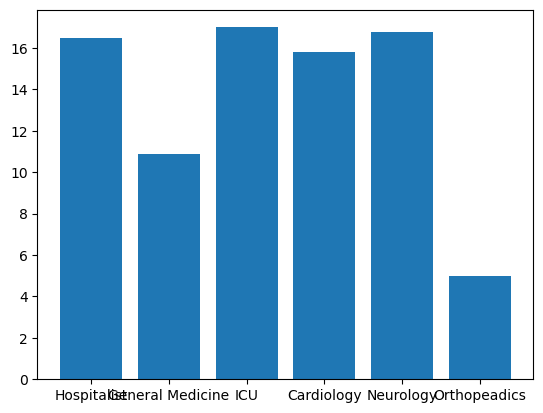

In [279]:
# 56. Create a bar chart on service & expected length of stay.
df_ReadmissionRegistry = pd.read_excel("HospitalDatabase.xlsx","ReAdmissionRegistry")
plt.bar(x = df_ReadmissionRegistry['Service'],height =df_ReadmissionRegistry['ExpectedLOS'])
plt.show()

In [31]:
# 57. Get the FirstName, LastName, DateOfBirth of the Patients whose reason for visit is Migraine. Use EDUnique Sheet for reason for visit.
df_Patients = pd.read_excel("HospitalDatabase.xlsx","Patients")
df_EDunique = pd.read_excel("HospitalDatabase.xlsx","EDUnique")
# only to get 3 columns for one datafram or drop unwanted.
df_Patients = df_Patients[df_Patients.columns[df_Patients.columns.isin(['FirstName','LastName','DateOfBirth',
                                                                        'NON-EXISTANT COLUMN'])]]
df_EDunique = df_EDunique[df_EDunique.columns[df_EDunique.columns.isin(['ReasonForVisit','NON-EXISTANT COLUMN'])]]
                                              
#merge two tables--

merge_details = pd.concat([df_Patients, df_EDunique], axis=1)

#print(merge_details)

# Condition on reason for visit is Migraine

filter_Migraine = merge_details[(merge_details['ReasonForVisit'] == 'Migraine')]
print(filter_Migraine)


      FirstName      LastName             DateOfBirth ReasonForVisit
1           Far         Myers 1985-11-15 02:08:42.090       Migraine
3       Carmine         Texas 1968-10-15 03:32:13.635       Migraine
22       Walter          Time 1971-02-20 18:41:59.737       Migraine
44       Barret      Doubrava 1962-10-18 08:23:23.478       Migraine
46      Cristen          Nock 1962-11-01 22:03:17.636       Migraine
..          ...           ...                     ...            ...
908    Freeland       Hawford 1985-02-08 22:19:00.712       Migraine
921  Georgianna         Group 1971-10-22 07:48:00.496       Migraine
928       Ediva     MacTeague 1963-04-05 17:42:15.238       Migraine
930       Letti  Landsborough 1971-05-31 09:42:54.177       Migraine
935    Philippa        Slocum 1963-07-21 21:19:53.583       Migraine

[116 rows x 4 columns]


In [11]:
# 58. Get the  number of patients based on service and primary diagnosis.
df_Discharges = pd.read_excel("HospitalDatabase.xlsx","Discharges")
df_Discharges =df_Discharges.drop(columns=['AdmissionID','AdmissionDate', 'DischargeDate',
                                   'DischargeDisposition','ExpectedLOS', 
                                   'ExpectedMortality'])

df_NoPatients = df_Discharges.groupby(['Service','PrimaryDiagnosis']).count()

print(df_NoPatients)

                                     PatientID
Service          PrimaryDiagnosis             
Cardiology       AMI                        40
                 Afib                       10
                 Broken Leg                  3
                 Flu                         2
                 Heart Failure              39
                 Kidney Failure              1
General Medicine Broken Leg                  3
                 Diabetes                   38
                 Fever                      13
                 Flu                        54
                 Hypertension               35
                 Kidney Failure             12
                 Laceration                 21
                 Pneumonia                  67
                 Stroke                     20
Hospitalist      AMI                         1
                 Broken Leg                  3
                 Diabetes                   26
                 Fever                       3
             

In [18]:
# 59. Display the patient details with maximum pulse pressure.
df_Patients = pd.read_excel("HospitalDatabase.xlsx","Patients")
df_AmbulatoryVisits = pd.read_excel("HospitalDatabase.xlsx","AmbulatoryVisits")
  
df_AmbulatoryVisits = df_AmbulatoryVisits.drop(columns =['VisitID','DateofVisit','DateScheduled',
                                                         'VisitDepartmentID','Pulse','VisitStatus'])
# MaxBloodPressure 
df_AmbulatoryVisits['Maxpressure'] =(df_AmbulatoryVisits['BloodPressureSystolic'] - df_AmbulatoryVisits['BloodPressureDiastolic'])
# merging  two tables without common column
merge_patients = pd.merge(df_Patients, df_AmbulatoryVisits, left_on='PatientID', right_on='PatientMRN')

max_pressure_patient = merge_patients[merge_patients['Maxpressure']== merge_patients['Maxpressure'].max()]
#print(max_pressure_patient)
for column in max_pressure_patient.columns:
    print(f"Column: {column}")
    print("Values:", max_pressure_patient[column].tolist())
   
    print()
                                           
  ##df_Patients = df_Patients.drop(columns=['FirstName', 'LastName', 'Race','Language'])                                             


Column: PatientID
Values: [865]

Column: FirstName
Values: ['Giovanni']

Column: LastName
Values: ['Borland']

Column: DateOfBirth
Values: [Timestamp('1960-12-01 13:16:18.100000')]

Column: Gender
Values: ['Female']

Column: Race
Values: ['White']

Column: Language
Values: ['English']

Column: PatientMRN
Values: [865]

Column: ProviderID
Values: [35]

Column: VisitType
Values: ['Follow Up']

Column: BloodPressureSystolic
Values: [188.0]

Column: BloodPressureDiastolic
Values: [117.8501631]

Column: Maxpressure
Values: [70.1498369]

